In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd


In [2]:
mnist = keras.datasets.fashion_mnist
(X_train_fall,y_train_fall),(X_test,y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
np.shape(X_train_fall),np.shape(y_train_fall)

((60000, 28, 28), (60000,))

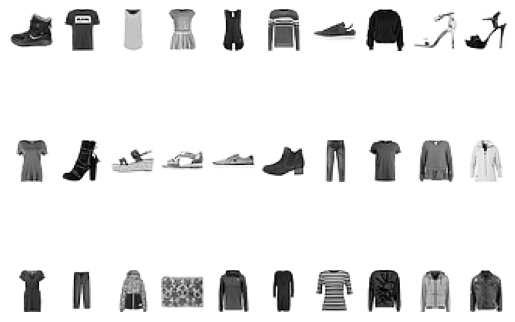

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 10)
for i in range(3):
  for j in range(10):
    ax[i,j].imshow(X_train_fall[i*10+j], cmap='Greys')
    ax[i,j].axis('off')
plt.show()


In [5]:
X_train , X_valid = X_train_fall[7000:]/255.0 , X_train_fall[:7000]/255.0
y_train , y_valid = y_train_fall[7000:] , y_train_fall[:7000]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
from collections import Counter

Counter(y_train)

Counter({9: 5292,
         0: 5348,
         5: 5301,
         8: 5308,
         1: 5246,
         6: 5310,
         7: 5295,
         4: 5329,
         2: 5290,
         3: 5281})

In [14]:
class_names[y_train[0]],y_train[0]

('Ankle boot', 9)

In [21]:
from keras import Sequential
from keras.layers import Flatten,Dense

model = Sequential()
model.add(Flatten (input_shape= [28,28]))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 100)               15100     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 10)               

In [28]:
weights, biases = model.get_layer('dense_6').get_weights()
weights

array([[-0.0630899 ,  0.0293008 ,  0.03346843, ...,  0.06076388,
        -0.05150872,  0.03882102],
       [-0.02644057, -0.02072824, -0.07223736, ..., -0.05314822,
         0.06170778,  0.03228727],
       [-0.00757443,  0.00258344,  0.05462406, ..., -0.05328947,
         0.05779774,  0.06900068],
       ...,
       [-0.02661673,  0.05830333,  0.01544352, ..., -0.00088657,
         0.00816886, -0.04400475],
       [-0.01981248,  0.005956  ,  0.01906245, ...,  0.07176498,
        -0.01112328, -0.06820949],
       [-0.03152228,  0.04247665,  0.00702815, ...,  0.04905064,
        -0.03284105, -0.03690442]], dtype=float32)

In [29]:
biases

array([ 1.32172927e-03, -9.35732014e-03, -2.05735629e-03, -1.64630567e-03,
        5.76198893e-03, -4.96243080e-03,  9.85507388e-03, -5.93900820e-03,
        5.09435683e-03,  3.95463966e-02,  2.46330327e-03,  1.21893371e-02,
        1.41329952e-02,  7.66343996e-03,  1.69637017e-02,  2.86705699e-02,
       -2.57817865e-03,  1.46333240e-02, -6.50412077e-03,  5.03167650e-03,
        6.75368868e-03,  1.03133786e-02,  1.96620426e-03,  2.46133097e-02,
       -3.27999843e-03,  1.88710745e-02,  2.02728417e-02,  8.89342558e-03,
        1.32965827e-02,  6.20928244e-04,  2.92264624e-03, -1.43339319e-04,
       -9.33387969e-03, -1.74955197e-03,  2.73817908e-02,  4.35779151e-03,
        5.35920681e-03,  2.22819159e-04,  4.13963135e-05, -1.07949944e-02,
        2.07029693e-02,  7.35658454e-03, -3.94665124e-03, -1.32009294e-02,
        2.56414954e-02,  3.32726573e-04,  2.58728527e-02,  6.79416722e-03,
       -1.91864069e-03,  3.34474035e-02, -4.07465879e-04,  9.04177967e-03,
        4.35040751e-03,  

In [54]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [58]:
model.fit(X_train , y_train , batch_size = 32 , epochs=10 , verbose=1 , validation_data=(X_valid,y_valid) , )

Epoch 1/10
1657/1657 [==============================] - 12s 7ms/step - loss: 0.2679 - accuracy: 0.9000 - val_loss: 0.3264 - val_accuracy: 0.8790
Epoch 2/10
1657/1657 [==============================] - 12s 7ms/step - loss: 0.2569 - accuracy: 0.9032 - val_loss: 0.3015 - val_accuracy: 0.8909
Epoch 3/10
1657/1657 [==============================] - 12s 7ms/step - loss: 0.2484 - accuracy: 0.9075 - val_loss: 0.3499 - val_accuracy: 0.8839
Epoch 4/10
1657/1657 [==============================] - 12s 7ms/step - loss: 0.2379 - accuracy: 0.9110 - val_loss: 0.3539 - val_accuracy: 0.8749
Epoch 5/10
1657/1657 [==============================] - 13s 8ms/step - loss: 0.2304 - accuracy: 0.9126 - val_loss: 0.3183 - val_accuracy: 0.8909
Epoch 6/10
1657/1657 [==============================] - 13s 8ms/step - loss: 0.2229 - accuracy: 0.9165 - val_loss: 0.3215 - val_accuracy: 0.8861
Epoch 7/10
1657/1657 [==============================] - 11s 6ms/step - loss: 0.2156 - accuracy: 0.9186 - val_loss: 0.3155 - val_ac

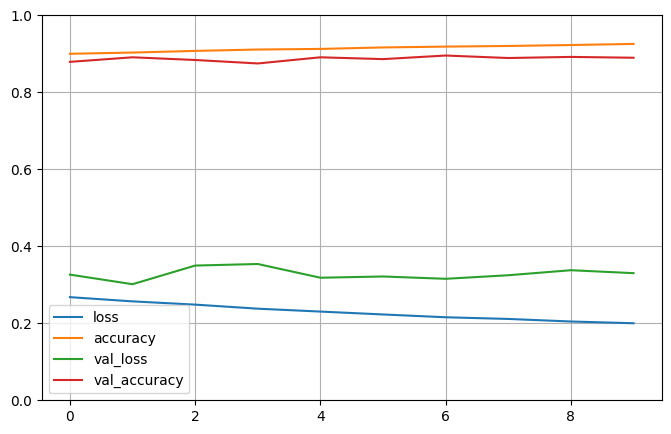

In [59]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1,) # set the vertical range to [0-1]
plt.show()

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 52.0282 - accuracy: 0.8613


[52.02824783325195, 0.861299991607666]

In [61]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 91ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred, axis=1)
y_pred,np.array(class_names)[y_pred]

1/1 [==============================] - 0s 21ms/step


(array([9, 2, 1]), array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

In [64]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)